<a href="https://colab.research.google.com/github/arridoarfiadi/StarData-Research/blob/main/Studying%20Machine%20Learning/KNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# K-Nearest Neighbors (KNN)

## Introduction

Definition

A supervised machine learning algorithm used for classification and regression tasks. The idea is to classify a data point based on the majority class of its k nearest neighbors in the feature space.

It's a memory-based learning methods, where the algorithm generalzes from the entire training dataset rather than learning a specific model during training



**If KNN is used for regression tasks, the predictions will be based on the mean or median of the K closest observations.**

**If KNN is used for classification purposes, the mode of the closest observations will serve for prediction.**







How it works:
*   Feed KNN your labeled dataset
*   determine the number of neighbors it should use to classify new data point
*   Give it a new unlabeled data point to predict. It will calculate the distinace to all data points in the "training" dataset.  

How it predicts the new output y for new observation X:
1.   Calculate total distances between X and all data points
2.   Retain K observations that has smaller distances to the observable point X
3.   With the y outputs taken from the K observations: a) apply the mean of the y deductions if its a regression problem b)use the mode of y deductions if its classification
4.   The final prediction will be the value calculated in step 3





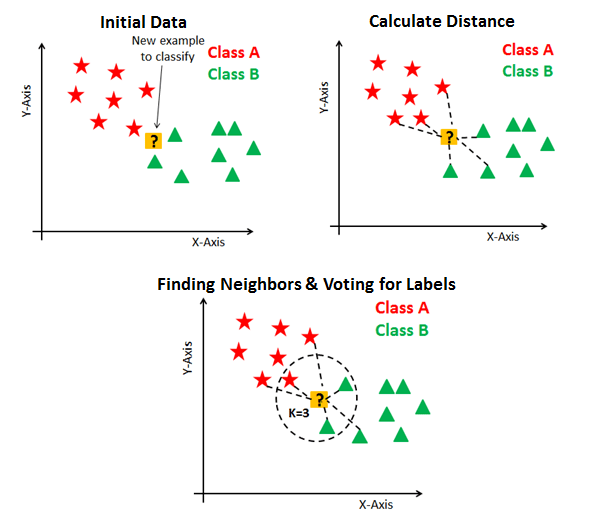

How to choose the K value
*   Just keep in mind the number of features and sample size per group. The more features/groups in the data set, the larger a selection needed to make in order to find an appropriate value of K
*   F1 score

F1 score - a metric used to evaluate the performance of a model. F1 Score = 2 * (Precision * Recall) / (Precision + Recall)

F1 score ranges from 0 to 1, where 1 indicates perfect precision and recall, and 0 indicates poor performance.

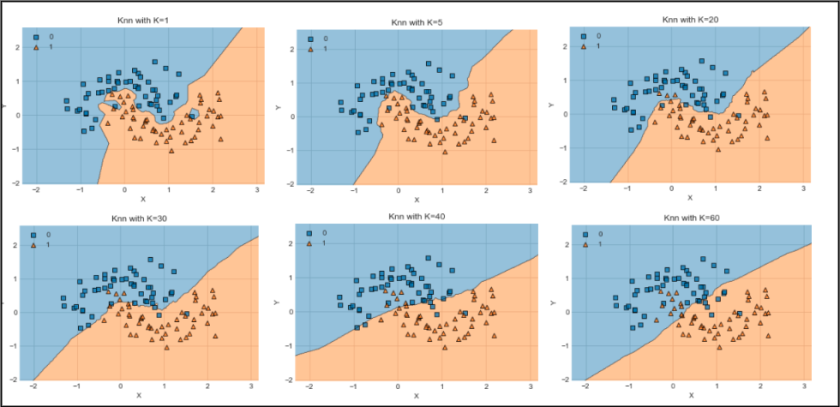

Assumptions:
*   Data is labeled
*   All features need to be relevant; treats all features equally
*   Data points need to be of same class or locally clustered in the same space
*   Have a balanced dataset to avoid KNN having biased towards classifying one particular class (for example in classification; 60% of your data set is class B while, class A only has 10%, class C has 10%)





Pros:
*   Very easy to understand!
*   Insensitive to outliers
*   Don't really need to clean the data
*   Versatile - can be used both classification & regression


Cons:
*   Computationally intensive and expensive!!!
*   Dimensionality curse - performs better with fewer set of features
*   Can't work with large datasets
*   Sensitive to imbalanced data







Use Cases:
*   Computer vision (image and handwriting recognition)
*   Recommendation systems





## Project 1: Star Data

### Load Data

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import pandas as pd
star_data = pd.read_csv('/content/drive/MyDrive/Star Data v2/data/StarDataset.csv')

**Data Dictionary**



*   Temperature (K) - the temperature of the star in Kelvins
*   Luminosity (L/Lo) - how bright the star is. Lo is watts
*   Radius (R/Ro) - radius of the star (solar radius)
*   Absolute Magnitude (Mv) - the intrinsic brightness of the star. Usefull for comparing true lumonisities of different objects without the influenceof their varying distance (this way a star that may be further away and a star that is closer are compared the same way)
*   Star Type - the predictor (0 = Brown Darf, 1 = Red Dwarf, 2 = White Dward, 3 = Main Sequence, 4 = Supergiant, 5 = Hypergiant)
*   Star Color - the color of the star
*   Spectral Class - classification of a star based on its characteristics. (O = very hot and blue, B = hot and blue, A = moderately hot and white, F = cooler than A-type, yellow-white, G = sun like sun, K = cooler than the sun, orange, M = cool and red, with M being the coolest











In [ ]:
star_data.head()

,Temperature (K),Luminosity(L/Lo),Radius(R/Ro),Absolute magnitude(Mv),Star type,Star color,Spectral Class
0,3068,0.002400,0.1700,16.12,0,Red,M
1,3042,0.000500,0.1542,16.60,0,Red,M
2,2600,0.000300,0.1020,18.70,0,Red,M
3,2800,0.000200,0.1600,16.65,0,Red,M
4,1939,0.000138,0.1030,20.06,0,Red,M


### Explore the data

In [ ]:
star_data.describe()

,Temperature (K),Luminosity(L/Lo),Radius(R/Ro),Absolute magnitude(Mv),Star type
count,240.000000,240.000000,240.000000,240.000000,240.000000
mean,10497.462500,107188.361635,237.157781,4.382396,2.500000
std,9552.425037,179432.244940,517.155763,10.532512,1.711394
min,1939.000000,0.000080,0.008400,-11.920000,0.000000
25%,3344.250000,0.000865,0.102750,-6.232500,1.000000
50%,5776.000000,0.070500,0.762500,8.313000,2.500000
75%,15055.500000,198050.000000,42.750000,13.697500,4.000000
max,40000.000000,849420.000000,1948.500000,20.060000,5.000000


In [ ]:
# we want to make sure that the predictor (star type) is evenly distributed to avoid knn being biased towards one class
star_data.mode()

,Temperature (K),Luminosity(L/Lo),Radius(R/Ro),Absolute magnitude(Mv),Star type,Star color,Spectral Class
0,3600.0,200000.0,0.11,12.23,0,Red,M
1,NaN,NaN,0.24,NaN,1,NaN,NaN
2,NaN,NaN,36.00,NaN,2,NaN,NaN
3,NaN,NaN,1324.00,NaN,3,NaN,NaN
4,NaN,NaN,NaN,NaN,4,NaN,NaN
5,NaN,NaN,NaN,NaN,5,NaN,NaN


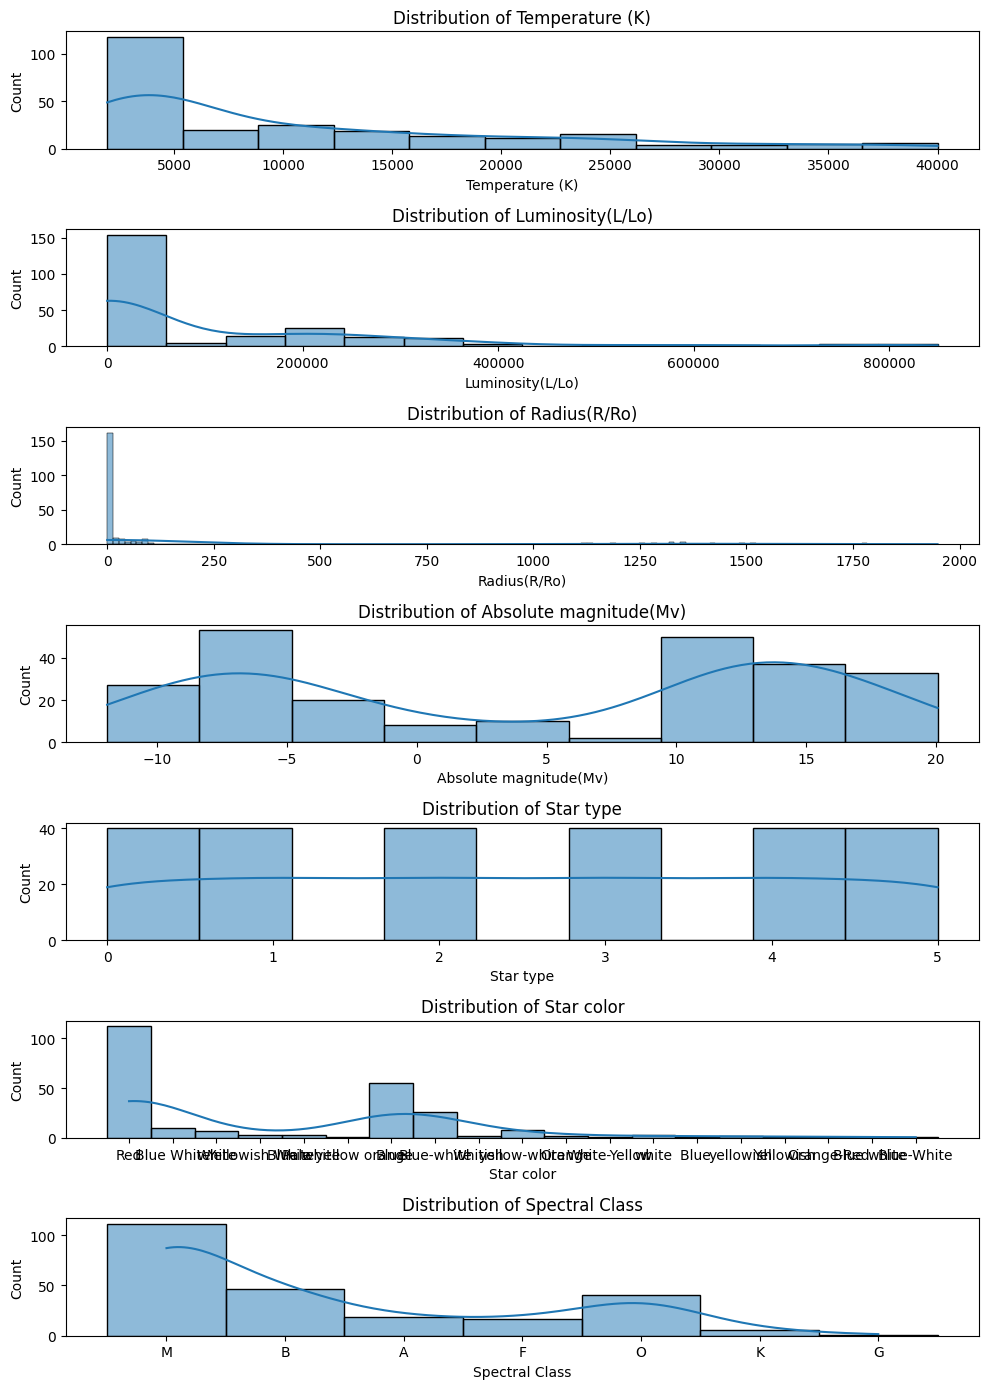

In [ ]:
#want to make sure that the previous cell code is correct, so we visually graph the distribution of the data for all columns
import seaborn as sns
import matplotlib.pyplot as plt

# Set up the matplotlib figure with subplots
fig, axes = plt.subplots(nrows=len(star_data.columns), figsize=(10, 2 * len(star_data.columns)))

# Loop through each column and create a distribution plot
for i, column in enumerate(star_data.columns):
    sns.histplot(star_data[column], ax=axes[i], kde=True)
    axes[i].set_title(f'Distribution of {column}')

# Adjust layout
plt.tight_layout()
plt.show()


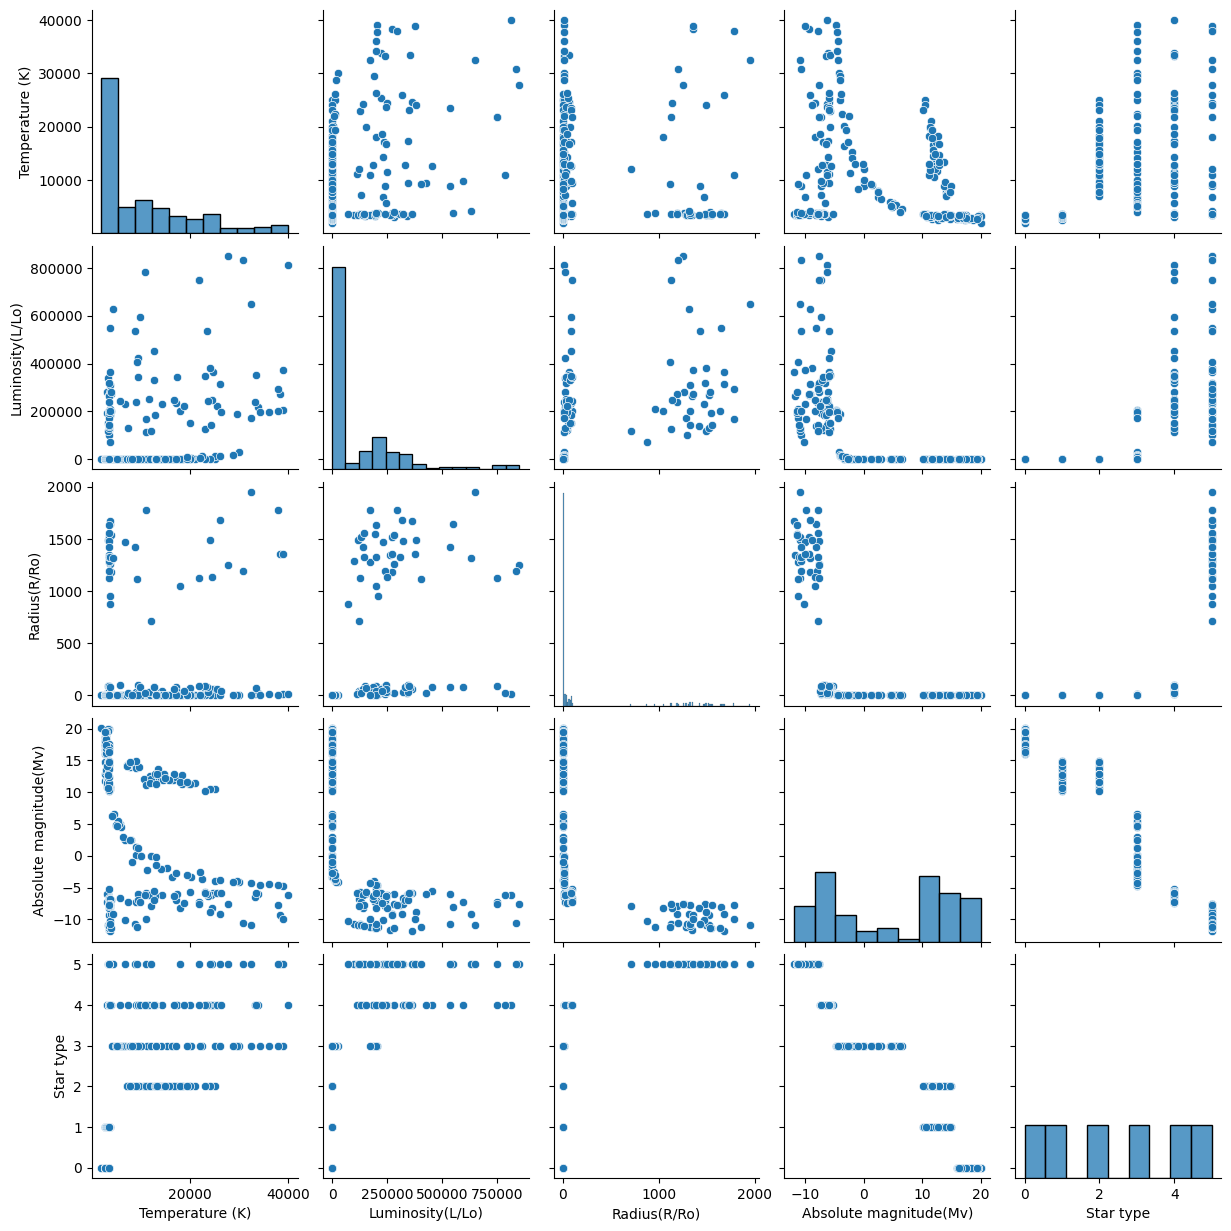

In [ ]:
sns.pairplot(star_data)

**Quick Observations**

*   There is clearly a relationship between the absolute magnitude and the temperature.
*   There are also seems to be a relationship between the absolute magniude and the star type. Notice how the hotter stars tend to no be as bright
*   What does a negative absolute magnitude value mean? Does that mean that there is no light and that it's a black hole?





### Figure out number of K (neighbors to consider) to recreate Hertzsprung-Russell (H-R) Diagram

In [ ]:
star_data.head()

,Temperature (K),Luminosity(L/Lo),Radius(R/Ro),Absolute magnitude(Mv),Star type,Star color,Spectral Class
0,3068,0.002400,0.1700,16.12,0,Red,M
1,3042,0.000500,0.1542,16.60,0,Red,M
2,2600,0.000300,0.1020,18.70,0,Red,M
3,2800,0.000200,0.1600,16.65,0,Red,M
4,1939,0.000138,0.1030,20.06,0,Red,M


In [7]:
from sklearn import datasets, neighbors
from mlxtend.plotting import plot_decision_regions
import matplotlib.pyplot as plt


def knn_comparison(data, k):
    x = data[['Temperature (K)', 'Absolute magnitude(Mv)']].values
    y = data['Star type'].values
    clf = neighbors.KNeighborsClassifier(n_neighbors=k)
    clf.fit(x, y)

    # Plotting decision region
    plot_decision_regions(x, y, clf=clf, legend=2)

    # Adding axes annotations
    plt.xlabel('Temperature (K)')
    plt.ylabel('Absolute Magnitude (Mv)')
    plt.title('Knn with K=' + str(k))

    # Inverting the x-axis and y-axis for H-R diagram representation
    plt.gca().invert_xaxis()
    plt.gca().invert_yaxis()

    plt.show()

/usr/local/lib/python3.10/dist-packages/mlxtend/plotting/decision_regions.py:346: UserWarning: You passed a edgecolor/edgecolors ('black') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  ax.scatter(


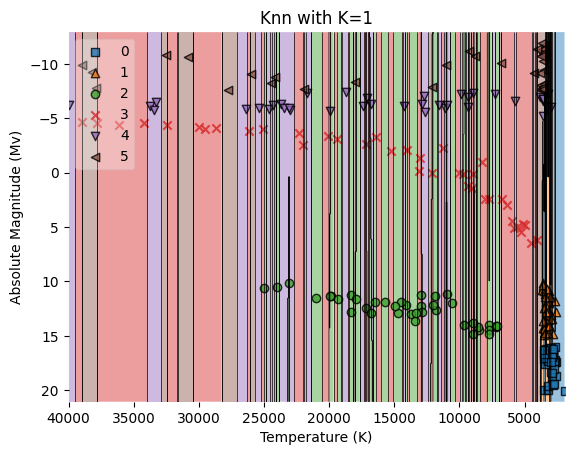

/usr/local/lib/python3.10/dist-packages/mlxtend/plotting/decision_regions.py:346: UserWarning: You passed a edgecolor/edgecolors ('black') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  ax.scatter(


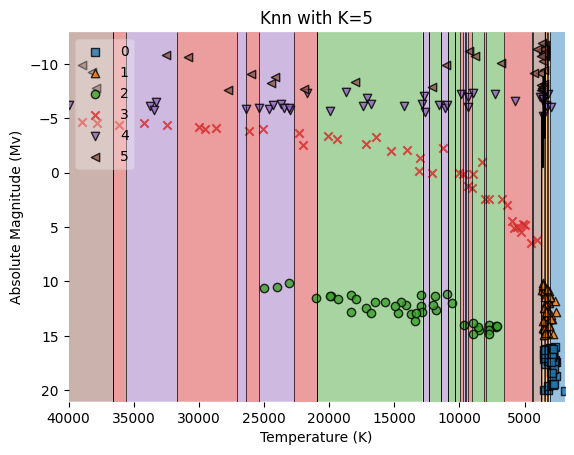

/usr/local/lib/python3.10/dist-packages/mlxtend/plotting/decision_regions.py:346: UserWarning: You passed a edgecolor/edgecolors ('black') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  ax.scatter(


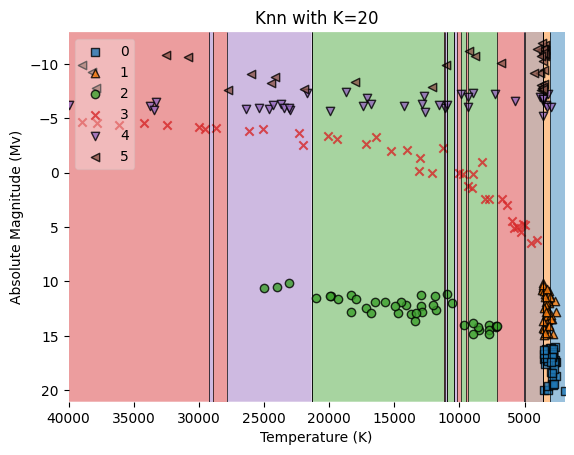

/usr/local/lib/python3.10/dist-packages/mlxtend/plotting/decision_regions.py:346: UserWarning: You passed a edgecolor/edgecolors ('black') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  ax.scatter(


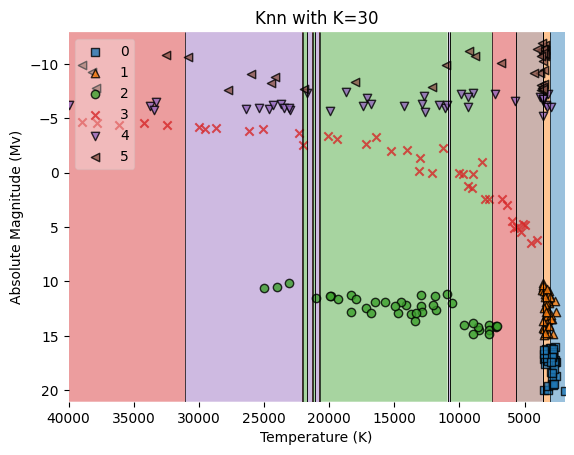

/usr/local/lib/python3.10/dist-packages/mlxtend/plotting/decision_regions.py:346: UserWarning: You passed a edgecolor/edgecolors ('black') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  ax.scatter(


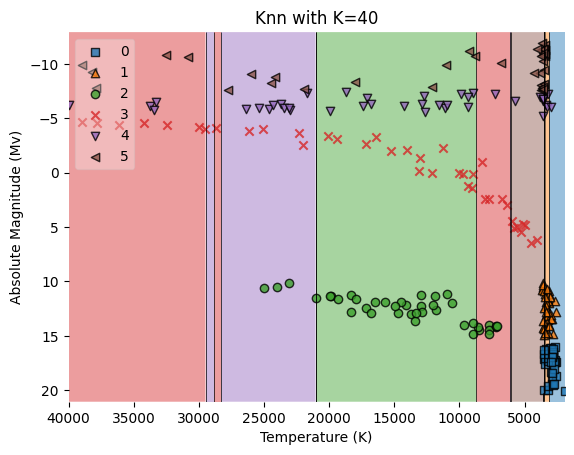

/usr/local/lib/python3.10/dist-packages/mlxtend/plotting/decision_regions.py:346: UserWarning: You passed a edgecolor/edgecolors ('black') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  ax.scatter(


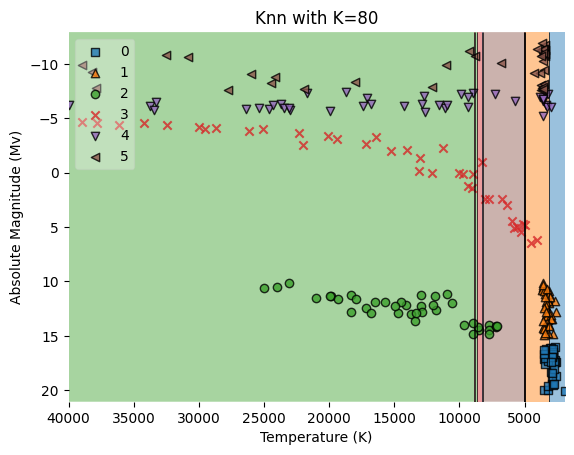

In [9]:
#comparing graph with different k values
for i in [1,5,20,30,40,80]:
    knn_comparison(star_data, i)

Results of this experiment: at first, we thought this dataset was perfect for KNN but as we can see KNN does not seem to understand or capture the relationship betwee temperature and absolute lumonisity to classify the star type. After running this experiment, we think setting a k-value of 20 - 30 would work best, but it's definetely not perfect and there are mostly likely better algorithms...

### Create Models to recreate Hertzsprung-Russell (H-R) Diagram

In [10]:
from sklearn.model_selection import train_test_split

# Split the data into training and test sets
x = star_data[['Temperature (K)', 'Absolute magnitude(Mv)']].values
y = star_data['Star type'].values
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.25)

In [11]:
print(X_test[0])
print(y_test[0])

[ 2.012e+04 -3.400e+00]
3


In [12]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import accuracy_score, precision_score, recall_score

# Create a KNN model
knn = KNeighborsClassifier(n_neighbors=24, weights="distance")

# Train the model
knn.fit(X_train, y_train)

# Make predictions on the test set
y_pred = knn.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='micro')
recall = recall_score(y_test, y_pred, average='micro')

print('Accuracy:', accuracy)
print('Precision:', precision)
print('Recall:', recall)

Accuracy: 0.4666666666666667
Precision: 0.4666666666666667
Recall: 0.4666666666666667


In [13]:
from sklearn.metrics import f1_score

f1 = f1_score(y_test, y_pred, average='micro')
f1

0.4666666666666667

Overall, we believe that KNN might not be the best model for this use case. The Hertzsprung-Russell (H-R) Diagram can be considered abstract and harder to determine the cluster.

## Project 2: Customer Data

### Load Data

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [14]:
import pandas as pd
customer_data = pd.read_csv('/content/drive/MyDrive/Star Data v2/data/marketing_campaign.csv')

In [ ]:
customer_data.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,...,5,0,0,0,0,0,0,3,11,0


### Explore the data

In [ ]:
# we want to make sure that the predictor (star type) is evenly distributed to avoid knn being biased towards one class
customer_data.mode()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,0,1976.0,Graduation,Married,7500.0,0.0,0.0,31-08-2012,56.0,2.0,...,7.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,11.0,0.0
1,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,9,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,13,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,17,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,11178,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2236,11181,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2237,11187,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2238,11188,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


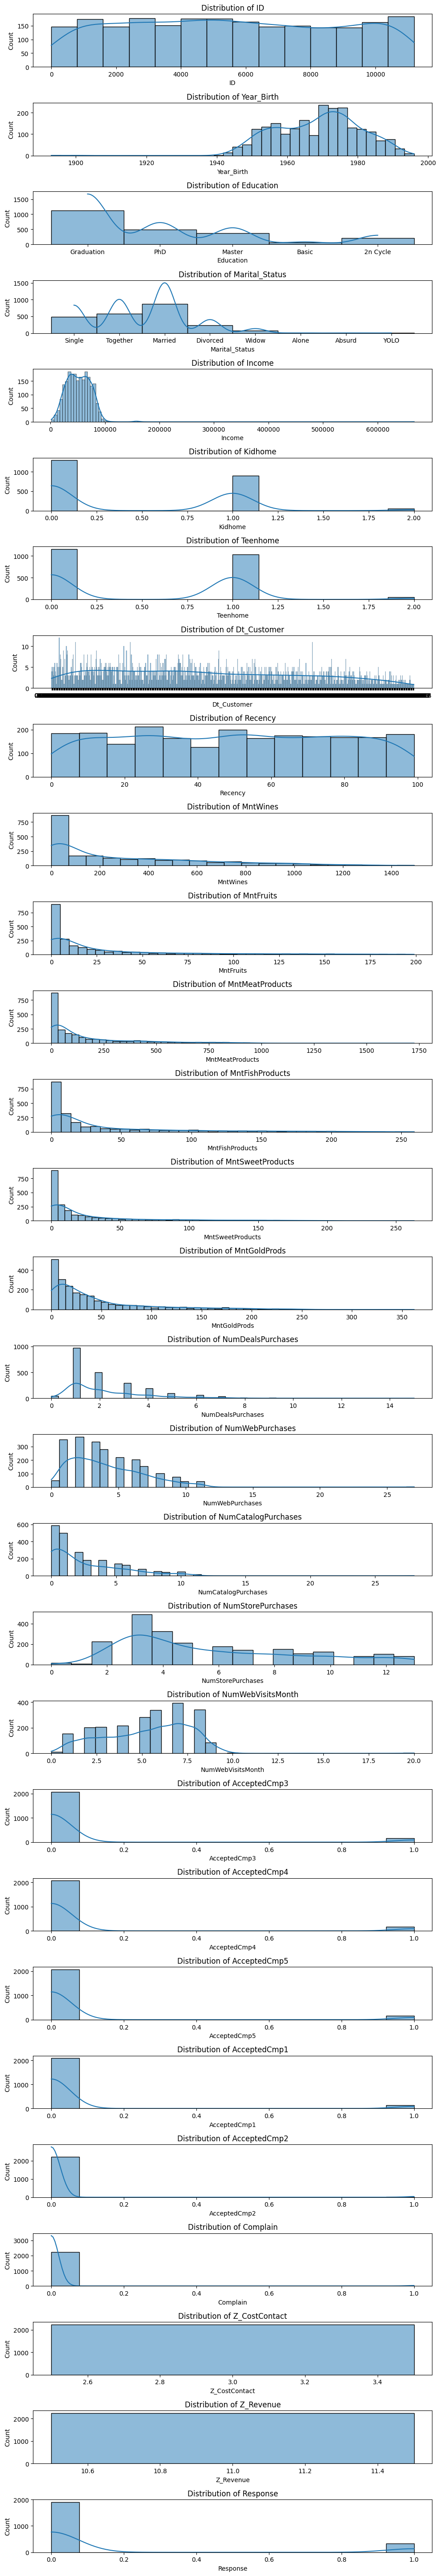

In [ ]:
#want to make sure that the previous cell code is correct, so we visually graph the distribution of the data for all columns
import seaborn as sns
import matplotlib.pyplot as plt

# Set up the matplotlib figure with subplots
fig, axes = plt.subplots(nrows=len(customer_data.columns), figsize=(10, 2 * len(customer_data.columns)))

# Loop through each column and create a distribution plot
for i, column in enumerate(customer_data.columns):
    sns.histplot(customer_data[column], ax=axes[i], kde=True)
    axes[i].set_title(f'Distribution of {column}')

# Adjust layout
plt.tight_layout()
plt.show()

In [ ]:
customer_data2 = customer_data[["MntWines", "Income", "MntMeatProducts", "Kidhome", "Teenhome", "MntSweetProducts"]]

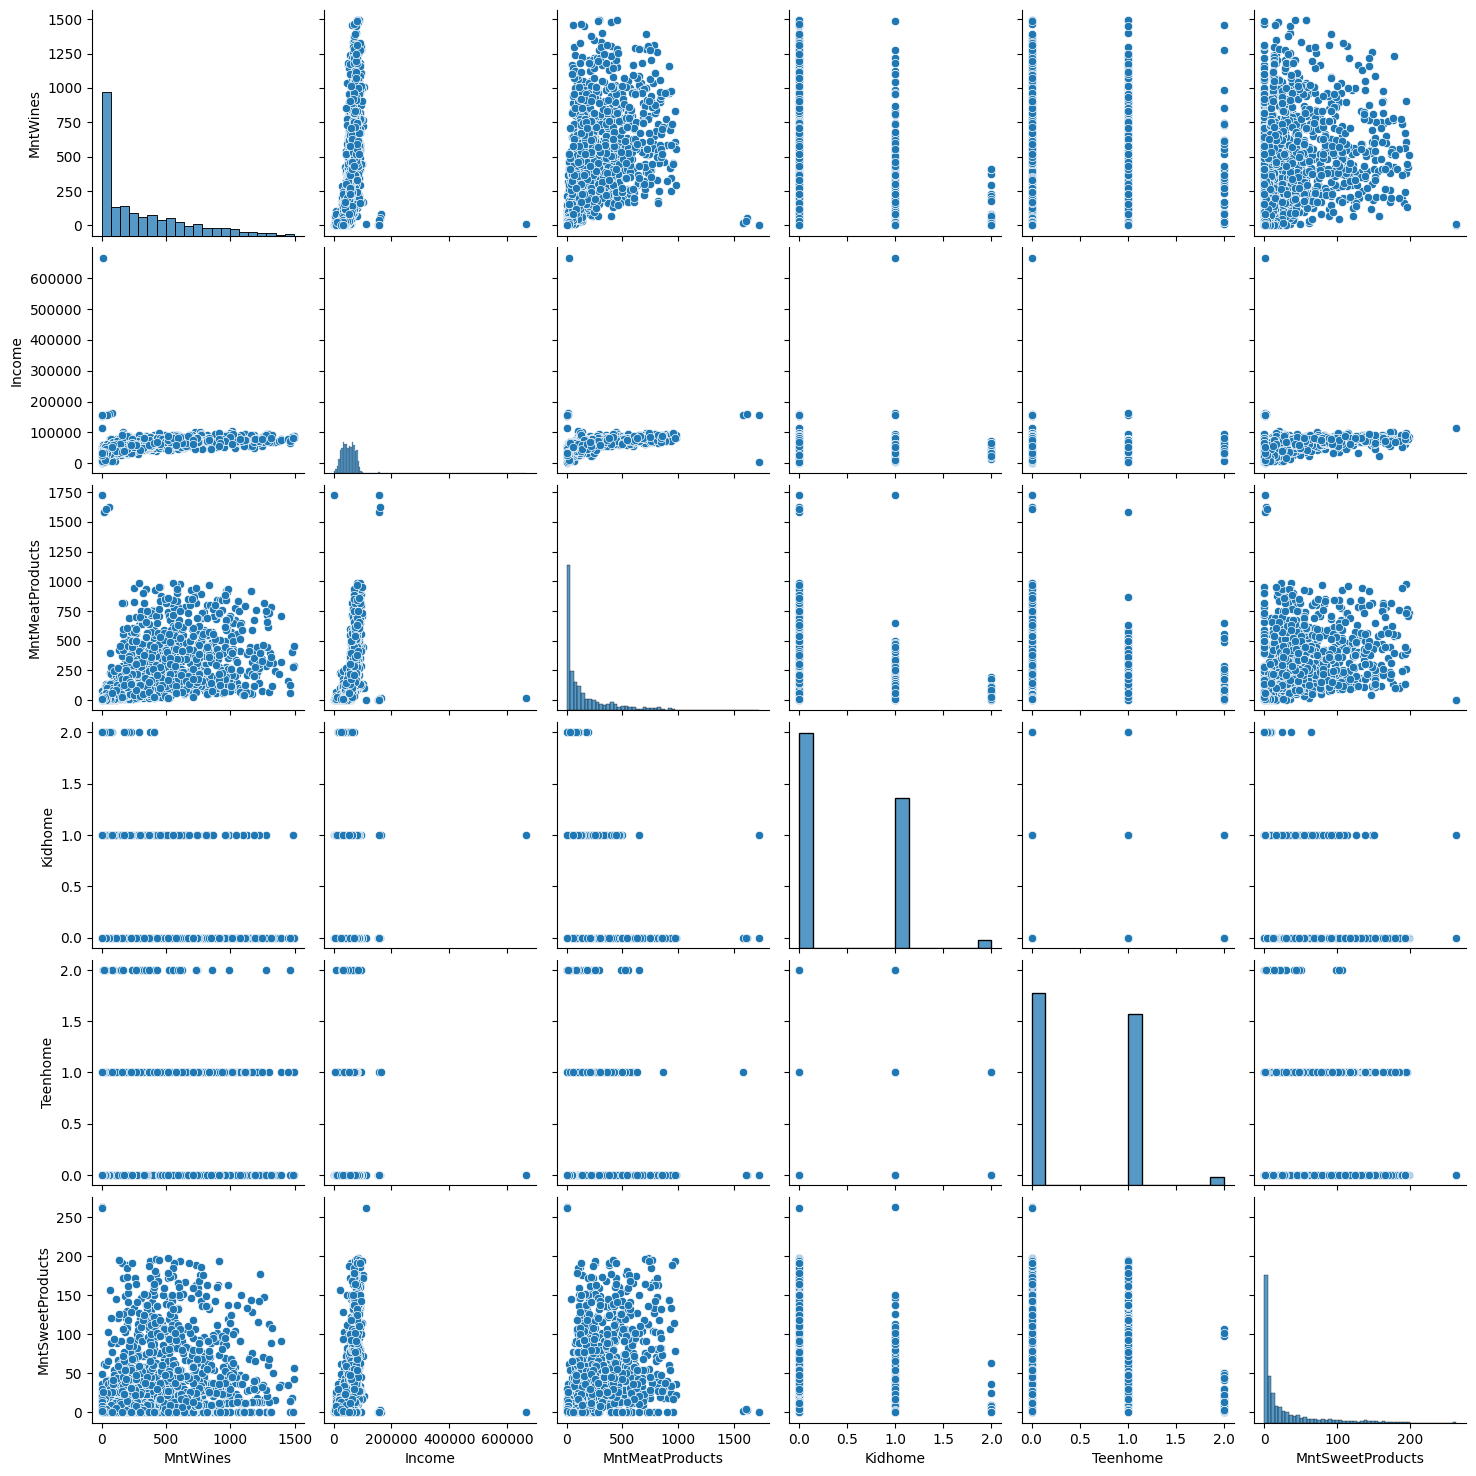

In [ ]:
import seaborn as sns

sns.pairplot(customer_data2)

Observation: Interesting to see the MntSweetProducts spent by customers with more kids would be more. We also thought they'd be better correlation or clustering between Income and MntWines. Our hunch is that after user make a certain amount of income, they'd choose to spend their wine money elsewhere

In [15]:
customer_data = customer_data[["MntWines", "Income", "Marital_Status"]].dropna()
customer_data = customer_data[customer_data['Income'] <= 100000]

In [16]:
customer_data['Marital_Status'].unique()

array(['Single', 'Together', 'Married', 'Divorced', 'Widow', 'Alone',
       'Absurd', 'YOLO'], dtype=object)

In [17]:
# Define the mapping dictionary
mapping = {'Single': 0, 'Together': 1, 'Married': 1, 'Divorced': 0, 'Widow': 0, 'Alone': 0,
       'Absurd' : 0, 'YOLO': 0}

# Apply the mapping to the DataFrame
customer_data['Marital_Status'] = customer_data['Marital_Status'].replace(mapping)

In [18]:
customer_data[["Income", "MntWines"]].describe()

,Income,MntWines
count,2203.000000,2203.000000
mean,51512.049932,305.584657
std,20577.702498,337.236335
min,1730.000000,0.000000
25%,35187.000000,24.000000
50%,51250.000000,177.000000
75%,68134.000000,505.000000
max,98777.000000,1493.000000


In [28]:
from sklearn import datasets, neighbors
from mlxtend.plotting import plot_decision_regions
import matplotlib.pyplot as plt

def knn_comparison(data, k):
    # Extract features and target variable
    x = data[['Income', 'MntWines']].values
    y = data['Marital_Status'].values

    # Create KNN classifier
    clf = neighbors.KNeighborsClassifier(n_neighbors=k)
    clf.fit(x, y)

    # Plotting decision region
    plot_decision_regions(x, y, clf=clf, legend=2)

    # Adding axes annotations
    plt.xlabel('Income')
    plt.ylabel('MntWines')
    plt.title(f'Knn with K={k}')

    plt.show()


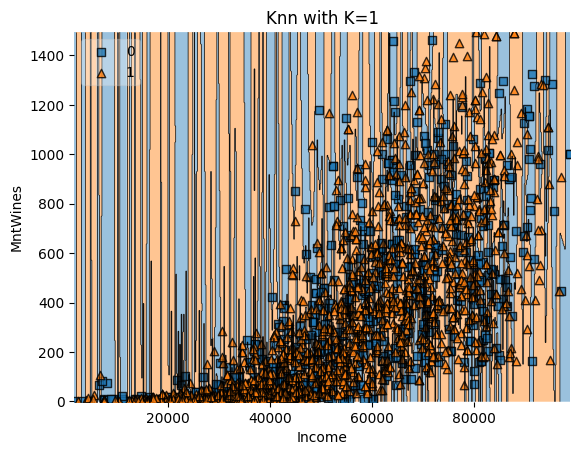

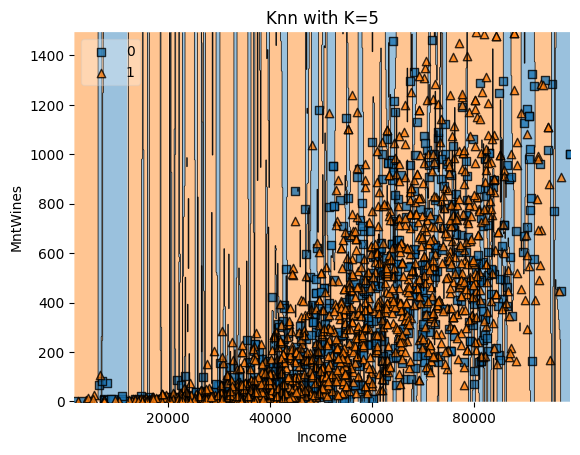

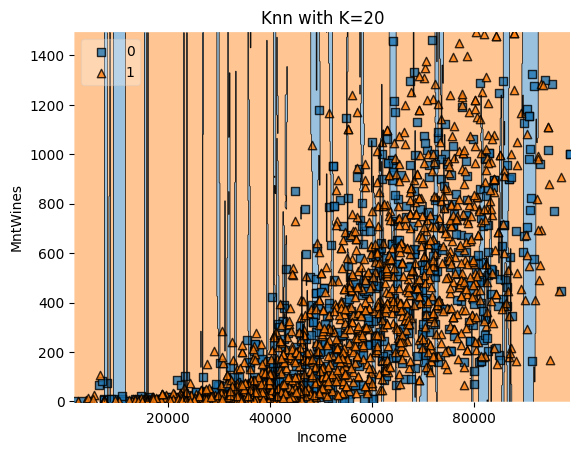

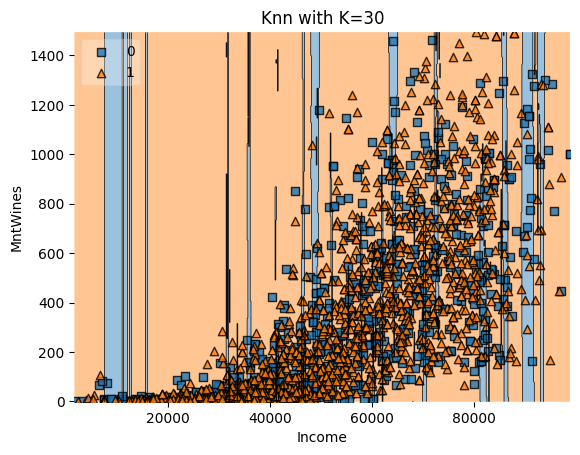

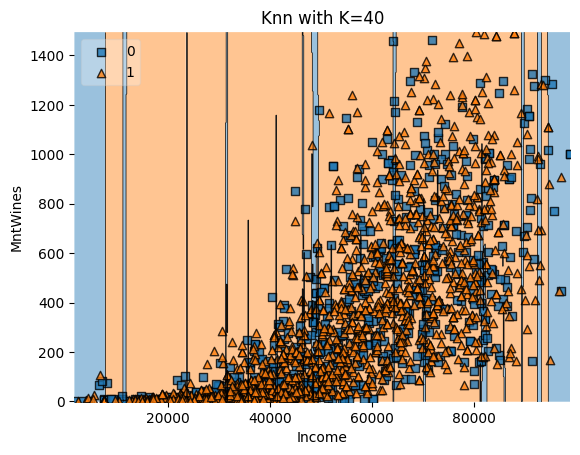

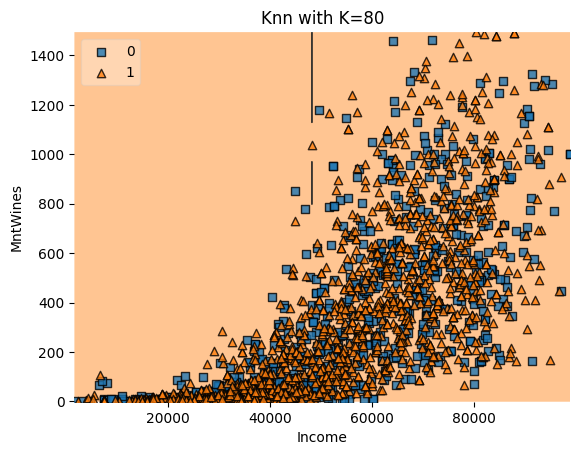

In [29]:
for i in [1,5,20,30,40,80]:
    knn_comparison(customer_data.dropna(inplace=False), i)

In [30]:
from sklearn.model_selection import train_test_split

# Split the data into training and test sets
x = customer_data[['Income', 'MntWines']].values
y = customer_data['Marital_Status'].values
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.25)

In [31]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import accuracy_score, precision_score, recall_score

# Create a KNN model
knn = KNeighborsClassifier(n_neighbors=5, weights="distance")

# Train the model
knn.fit(X_train, y_train)

# Make predictions on the test set
y_pred = knn.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='micro')
recall = recall_score(y_test, y_pred, average='micro')

print('Accuracy:', accuracy)
print('Precision:', precision)
print('Recall:', recall)

Accuracy: 0.6279491833030852
Precision: 0.6279491833030852
Recall: 0.6279491833030852


Overall: This indicates a moderate predictive performance, suggesting that while the model is better than random guessing, there is substantial room for improvement